## Análisis de los archivos

### Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
info1 = pd.read_csv('../data/info_01.csv')
info2 = pd.read_csv('../data/info_02.csv')

In [3]:
info1.describe()

,id,id2,v4,v5,v6
count,17286.000000,17286.000000,17286.000000,17286.000000,17286.000000
mean,4075.651047,4075.651047,606.032176,25.730504,0.003862
std,2347.052912,2347.052912,313.824105,5.527639,0.000851
min,1.000000,1.000000,412.800000,16.700000,0.002674
25%,2042.250000,2042.250000,439.000000,20.200000,0.003080
50%,4086.000000,4086.000000,453.500000,26.200000,0.003800
75%,6102.750000,6102.750000,637.500000,30.500000,0.004351
max,8143.000000,8143.000000,2028.500000,39.100000,0.006476


En los resultados de las columnas id y id2 se puede ver que los datos son iguales por lo que se puede eliminar una de las columnas.

In [4]:
info2.describe()

,id,id2,v1,c1,v2
count,17286.000000,17286.000000,17286.000000,17286.000000,17286.000000
mean,4075.651047,4075.651047,119.141542,0.211674,20.617257
std,2347.052912,2347.052912,194.511597,0.408507,1.018207
min,1.000000,1.000000,0.000000,0.000000,19.000000
25%,2042.250000,2042.250000,0.000000,0.000000,19.700000
50%,4086.000000,4086.000000,0.000000,0.000000,20.400000
75%,6102.750000,6102.750000,252.000000,0.000000,21.400000
max,8143.000000,8143.000000,1546.300000,1.000000,23.200000


Sucede lo mismo en este archivo, id y id2 son iguales por lo que se puede eliminar una de las columnas


In [5]:
info1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17286 entries, 0 to 17285
Data columns (total 5 columns):
id     17286 non-null int64
id2    17286 non-null int64
v4     17286 non-null float64
v5     17286 non-null float64
v6     17286 non-null float64
dtypes: float64(3), int64(2)
memory usage: 675.4 KB


El documento info1 no contiene datos nulos

In [6]:
info2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17286 entries, 0 to 17285
Data columns (total 6 columns):
id     17286 non-null int64
id2    17286 non-null int64
v1     17286 non-null float64
c1     17286 non-null int64
v2     17286 non-null float64
v3     16286 non-null object
dtypes: float64(2), int64(3), object(1)
memory usage: 810.4+ KB


In [7]:
nulos = info2[info2['v3'].isnull()]
print("El documento info2 cuenta con valores nulos en la columna v3 que representan el  {0:f}% de los datos".format(len(nulos)/len(info2)*100))

El documento info2 cuenta con valores nulos en la columna v3 que representan el  5.785028% de los datos


Antes de eliminar esta columna analizaré si la columna tiene una correlación importante con los datos, la columna v3 tiene datos de fechas por lo que cambiaré el formato

In [8]:
info2['v3'] = pd.to_datetime(info2['v3'])

In [9]:
info2.head()

,id,id2,v1,c1,v2,v3
0,1,1,426.0,1,23.2,2015-02-04 17:51:00
1,1,1,426.0,1,23.2,2015-02-04 17:51:00
2,2,2,429.5,1,23.1,2015-02-04 17:51:59
3,2,2,429.5,1,23.1,2015-02-04 17:51:59
4,3,3,426.0,1,23.1,2015-02-04 17:53:00


### Modelo de clasificación

EL archivo info2 cuenta con la columna c1, la cuál entiendo que es la columna que describre la clase a la que pertenece el registro y que me premitirá entrenar un modelo.

In [11]:
clasificacion = info2.copy()
clasificacion.drop(['id2'],axis=1,inplace = True)
clasificacion.head()

,id,v1,c1,v2,v3
0,1,426.0,1,23.2,2015-02-04 17:51:00
1,1,426.0,1,23.2,2015-02-04 17:51:00
2,2,429.5,1,23.1,2015-02-04 17:51:59
3,2,429.5,1,23.1,2015-02-04 17:51:59
4,3,426.0,1,23.1,2015-02-04 17:53:00


La columna de id sugieren que existen registros duplicados en el dataframe por lo que procederé a confirmarlo

In [12]:
clasificacion = clasificacion.sort_values(by=['id'])
clasificacion.duplicated(clasificacion.columns[~clasificacion.columns.isin(['id'])])

0        False
1         True
2        False
3         True
4        False
         ...  
16281     True
16282    False
16283     True
16284    False
16285     True
Length: 17286, dtype: bool

En la celda anterior se ordena por id y se verifica que los datos de las demás columnas estén duplicados. Existen registros con valor True, lo que indica que existen datos duplicados que procederé a eliminar

In [13]:
df_limpio = clasificacion.drop_duplicates(clasificacion.columns[~clasificacion.columns.isin(['id'])],keep='first')

In [14]:
df_limpio.describe()

,id,v1,c1,v2
count,8472.000000,8472.000000,8472.000000,8472.000000
mean,4060.695940,125.646565,0.222262,20.644618
std,2344.245545,197.650137,0.415791,1.027205
min,1.000000,0.000000,0.000000,19.000000
25%,2040.750000,0.000000,0.000000,19.700000
50%,4055.500000,0.000000,0.000000,20.500000
75%,6081.250000,307.900000,0.000000,21.400000
max,8143.000000,1546.300000,1.000000,23.200000


In [15]:
df_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8472 entries, 0 to 16284
Data columns (total 5 columns):
id    8472 non-null int64
v1    8472 non-null float64
c1    8472 non-null int64
v2    8472 non-null float64
v3    8143 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 397.1 KB


In [16]:
nulos = df_limpio[df_limpio['v3'].isnull()]
print("El dataframe ahora sin duplicados cuenta con el {0:f}% de datos nulos".format(len(nulos)/len(df_limpio)*100))

El dataframe ahora sin duplicados cuenta con el 3.883381% de datos nulos


El porcentaje de dato que son nulos es bajo por lo que decido eliminarlos.

In [17]:
df_limpio.dropna(inplace = True)

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


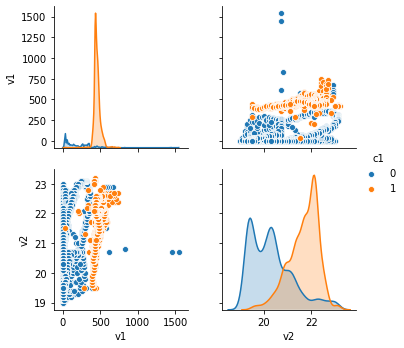

In [23]:
sn.pairplot(df_limpio, vars=["v1", "v2"], hue='c1')

### Matriz de correlación

In [24]:
df_limpio.corr()

,id,v1,c1,v2
id,1.000000,-0.121960,-0.098155,-0.442203
v1,-0.121960,1.000000,0.907352,0.649623
c1,-0.098155,0.907352,1.000000,0.537776
v2,-0.442203,0.649623,0.537776,1.000000
